In [2]:
import os
import pandas as pd

def load_telia_data(folder):
        """Laster alle CSV-filer i de oppgitte mappene og kombinerer dem til én DataFrame per type."""
        
        def load_csvs_from_folder(folder):
            """Hjelpefunksjon for å finne og slå sammen alle CSV-filer i en mappe."""
    
            if not os.path.exists(folder):
                raise FileNotFoundError(f"Mappen {folder} eksisterer ikke.")

            csv_files = [f for f in os.listdir(folder) if f.endswith(".csv")]
            if not csv_files:
                raise FileNotFoundError(f"Ingen CSV-filer funnet i {folder}")
            
            df_list = []
            for file in csv_files:
                file_path = os.path.join(folder, file)
                df = pd.read_csv(file_path, sep=";")  # Juster separator hvis nødvendig
                df_list.append(df)

            return pd.concat(df_list, ignore_index=True)

        # Laste timelige data
        hourly_data = load_csvs_from_folder(folder)
        print(f"✅ Lastet inn {len(hourly_data)} rader fra timelige Telia-data.")
        return hourly_data
        
folder="data/telia/hourly"
df = load_telia_data(folder)

✅ Lastet inn 82798311 rader fra timelige Telia-data.


In [5]:
print(df)

         batch_date  hour     way_id  tag_key   tag_value admin_level_2  \
0        2022-11-03     5  717959781  highway       trunk     Trondheim   
1        2022-11-03    19  733976762  highway    tertiary     Trondheim   
2        2022-11-03    21  724402416  highway   secondary     Trondheim   
3        2022-11-03    16  727900571  highway   secondary     Trondheim   
4        2022-11-03    18  697301994  highway  trunk_link     Trondheim   
...             ...   ...        ...      ...         ...           ...   
82798306 2020-01-26    18  774734983  highway       trunk     Trondheim   
82798307 2020-01-26     8  774734984  highway       trunk     Trondheim   
82798308 2020-01-26    17  785686875  highway   secondary     Trondheim   
82798309 2020-01-26     7  774734982  highway       trunk     Trondheim   
82798310 2020-01-26     1  774734982  highway       trunk     Trondheim   

          people  
0            256  
1            256  
2            256  
3            768  
4   

In [4]:
import pandas as pd

def calculate_hourly_distributions(df):
    # Convert 'batch_date' and 'hour' columns to datetime and integer types respectively
    df['batch_date'] = pd.to_datetime(df['batch_date'])
    df['hour'] = df['hour'].astype(int)
    df['people'] = df['people'].astype(int)

    # Group by 'batch_date', 'hour', and 'tag_value' and calculate the mean of 'people'
    hourly_distributions = df.groupby(['hour', 'tag_value'])['people'].mean().reset_index()

    return hourly_distributions

# Calculate the hourly distributions
hourly_distributions = calculate_hourly_distributions(df)

# Print the result
print(hourly_distributions)

     hour       tag_value      people
0       0        motorway  151.957989
1       0   motorway_link   35.074299
2       0         primary   88.996813
3       0            rail   18.839144
4       0       secondary   59.115970
..    ...             ...         ...
235    23  secondary_link   55.525596
236    23        tertiary   54.126582
237    23   tertiary_link   28.646789
238    23           trunk  343.107932
239    23      trunk_link   77.374996

[240 rows x 3 columns]


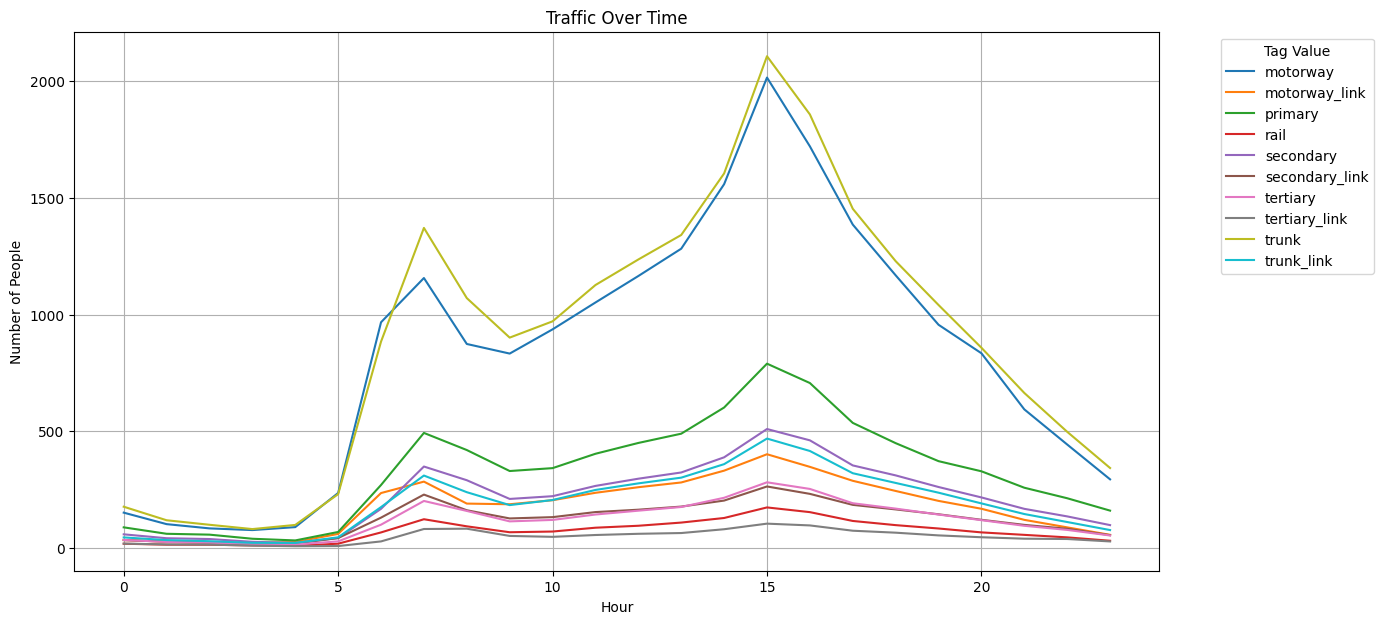

In [7]:
import matplotlib.pyplot as plt

# Pivot the dataframe to have hours as index and tag_values as columns
pivot_df = hourly_distributions.pivot(index='hour', columns='tag_value', values='people')

# Plot the data
pivot_df.plot(kind='line', figsize=(14, 7))
plt.title('Traffic Over Time')
plt.xlabel('Hour')
plt.ylabel('Number of People')
plt.legend(title='Tag Value', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()